In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from functools import reduce
import matplotlib.pyplot as plt 

In [137]:
class Walmart():
    """
        Você foi contratado pelo Walmart para fazer um levantamento do
        faturamento das lojas nos USA e apontar qual loja seria melhor para
        expandir seu tamanho.
        
        É preciso analisar as vendas semanais de cada loja, calcular algumas
        informações importantes que serão perguntadas e ao ﬁnal de tudo, indicar
        em qual loja deva ser investida.
    """

    def __init__(self):
        path = r'data/Walmart.csv'
        self.df = pd.read_csv(
            filepath_or_buffer=path,
            date_parser='Date',
            sep=',',
            decimal='.',
        )

    def convertendo_a_coluna_date_para_o_tipo_datetime(self):
        self.df['Date'] = pd.to_datetime(
            arg=self.df['Date'],
            format='%d-%m-%Y'
        )

    def criando_a_coluna_year_e_a_coluna_month(self):
        self.df['month'] = self.df['Date'].dt.month
        self.df['year'] = self.df['Date'].dt.year

    def faturamento_anual_por_loja(self):
        years = [2010, 2011, 2012]
        dfs = {}
        data_frames = []

        for year in years:
            df = self.df[
                (self.df['year'] == year)
            ]

            df.rename(
                columns = {'Weekly_Sales':f'faturamento_{year}'}, 
                inplace = True
            )
            
            dfs[year] = df.groupby('Store').agg({f'faturamento_{year}':'sum'}).astype(int).reset_index()

            data_frames.append(dfs[year])

        self.df_merge = reduce(
            lambda  left, right: 
                pd.merge(
                    left,
                    right,
                    on=['Store'],
                    how='outer'
                ), data_frames
        )

    def faturamento_total(self):
        df = self.df
        df = df.groupby('Store').agg({'Weekly_Sales':'sum'}).astype(int).reset_index()

        faturamento_total = []

        for store in self.df_merge['Store']:
            df_filtrado = df[
                (df['Store'] == store)
            ]['Weekly_Sales'].iloc[0]

            faturamento_total.append(df_filtrado)
            
        self.df_merge['faturamento_total'] = faturamento_total

    def venda_nos_feriado_anualmente_por_loja(self):
        years = [2010, 2011, 2012]
        dfs = {}
        data_frames = []

        for year in years:
            df = self.df[
                (self.df['year'] == year) &
                (self.df['Holiday_Flag'] == 1)
            ]

            df.rename(
                columns = {'Weekly_Sales':f'venda_nos_feriados_{year}'}, 
                inplace = True
            )
            
            dfs[year] = df.groupby('Store').agg({f'venda_nos_feriados_{year}':'sum'}).astype(int).reset_index()

            data_frames.append(dfs[year])

        df_merge = reduce(
            lambda  left, right: 
                pd.merge(
                    left,
                    right,
                    on=['Store'],
                    how='outer'
                ), data_frames
        )

        self.df_merge = self.df_merge.merge(
            df_merge,
            on='Store'
        )

    def venda_total_nos_feriados(self):
        df = self.df

        df = df[
            (df['Holiday_Flag'] == 1)
        ]

        df = df.groupby('Store').agg({'Weekly_Sales':'sum'}).astype(int).reset_index()

        venda_total_nos_feriados = []

        for store in self.df_merge['Store']:
            df_filtrado = df[
                (df['Store'] == store)
            ]['Weekly_Sales'].iloc[0]

            venda_total_nos_feriados.append(df_filtrado)
            
        self.df_merge['venda_total_nos_feriados'] = venda_total_nos_feriados
    
    def preço_médio_semanal_por_loja(self):
        df = self.df[
            [
                'Store',
                'Weekly_Sales'
            ]
        ]

        df = df[(np.abs(stats.zscore(df['Weekly_Sales'])) < 3)]
        df = df.groupby('Store').agg({'Weekly_Sales':'mean'}).astype(int).reset_index()

        média_de_vendas_semanais = []

        for store in self.df_merge['Store']:
            df_filtrado = df[
                (df['Store'] == store)
            ]['Weekly_Sales'].iloc[0]

            média_de_vendas_semanais.append(df_filtrado)

        self.df_merge['média_de_vendas_semanais'] = média_de_vendas_semanais
        
    def rakeamento_de_lojas(self):
        ranking_das_lojas = []

        for index, store in enumerate(self.df_merge['Store']):
            ranking_das_lojas.append(0)
            
            # -------- Maior_faturamento_total
            faturamento_total = self.df_merge[
                (self.df_merge['Store'] == store)
            ]['faturamento_total'].iloc[0]
            
            maior_faturamento = self.df_merge[
                (self.df_merge['faturamento_total'] == self.df_merge['faturamento_total'].max())
            ]['faturamento_total'].iloc[0]

            # -------- Maior_faturamento_2010
            faturamento_2010 = self.df_merge[
                (self.df_merge['Store'] == store)
            ]['faturamento_2010'].iloc[0]
            
            maior_faturamento_2010 = self.df_merge[
                (self.df_merge['faturamento_2010'] == self.df_merge['faturamento_2010'].max())
            ]['faturamento_2010'].iloc[0]

            # -------- Maior_faturamento_2011
            faturamento_2011 = self.df_merge[
                (self.df_merge['Store'] == store)
            ]['faturamento_2011'].iloc[0]
            
            maior_faturamento_2011 = self.df_merge[
                (self.df_merge['faturamento_2011'] == self.df_merge['faturamento_2011'].max())
            ]['faturamento_2011'].iloc[0]

            # -------- Maior_faturamento_2012
            faturamento_2012 = self.df_merge[
                (self.df_merge['Store'] == store)
            ]['faturamento_2012'].iloc[0]
            
            maior_faturamento_2012 = self.df_merge[
                (self.df_merge['faturamento_2012'] == self.df_merge['faturamento_2012'].max())
            ]['faturamento_2012'].iloc[0]

            # -------- Venda_total_nos_feriados
            venda_total_nos_feriados = self.df_merge[
                (self.df_merge['Store'] == store)
            ]['venda_total_nos_feriados'].iloc[0]
            
            maior_venda_total_nos_feriados = self.df_merge[
                (self.df_merge['venda_total_nos_feriados'] == self.df_merge['venda_total_nos_feriados'].max())
            ]['venda_total_nos_feriados'].iloc[0]

            # -------- Venda_nos_feriados_2010
            venda_nos_feriados_2010 = self.df_merge[
                (self.df_merge['Store'] == store)
            ]['venda_nos_feriados_2010'].iloc[0]
            
            maior_venda_nos_feriados_2010 = self.df_merge[
                (self.df_merge['venda_nos_feriados_2010'] == self.df_merge['venda_nos_feriados_2010'].max())
            ]['venda_nos_feriados_2010'].iloc[0]

            # -------- Venda_nos_feriados_2011
            venda_nos_feriados_2011 = self.df_merge[
                (self.df_merge['Store'] == store)
            ]['venda_nos_feriados_2011'].iloc[0]
            
            maior_venda_nos_feriados_2011 = self.df_merge[
                (self.df_merge['venda_nos_feriados_2011'] == self.df_merge['venda_nos_feriados_2011'].max())
            ]['venda_nos_feriados_2011'].iloc[0]

            # -------- Venda_nos_feriados_2012
            venda_nos_feriados_2012 = self.df_merge[
                (self.df_merge['Store'] == store)
            ]['venda_nos_feriados_2012'].iloc[0]
            
            maior_venda_nos_feriados_2012 = self.df_merge[
                (self.df_merge['venda_nos_feriados_2012'] == self.df_merge['venda_nos_feriados_2012'].max())
            ]['venda_nos_feriados_2012'].iloc[0]

            # -------- Venda_nos_feriados_2012
            média_de_vendas_semanais = self.df_merge[
                (self.df_merge['Store'] == store)
            ]['média_de_vendas_semanais'].iloc[0]
            
            maior_média_de_vendas_semanais = self.df_merge[
                (self.df_merge['média_de_vendas_semanais'] == self.df_merge['média_de_vendas_semanais'].max())
            ]['média_de_vendas_semanais'].iloc[0]

            # -------- Faturamento
            if faturamento_total == maior_faturamento:
                ranking_das_lojas[index] += 30

            if faturamento_2010 == maior_faturamento_2010:
                ranking_das_lojas[index] += 10

            if faturamento_2011 == maior_faturamento_2011:
                ranking_das_lojas[index] += 10

            if faturamento_2012 == maior_faturamento_2012:
                ranking_das_lojas[index] += 10

            # -------- Maior taxa de crescimento do faturamento
            if (
                (faturamento_2011 > faturamento_2010) and
                (faturamento_2012 > faturamento_2011)
                ):
                ranking_das_lojas[index] += 50

            # -------- Venda nos feriados
            if venda_total_nos_feriados == maior_venda_total_nos_feriados:
                ranking_das_lojas[index] += 30

            if venda_nos_feriados_2010 == maior_venda_nos_feriados_2010:
                ranking_das_lojas[index] += 20

            if venda_nos_feriados_2011 == maior_venda_nos_feriados_2011:
                ranking_das_lojas[index] += 20

            if venda_nos_feriados_2012 == maior_venda_nos_feriados_2012:
                ranking_das_lojas[index] += 20

            # -------- Maior taxa de crescimento das vendas nos feriados
            if (
                (venda_nos_feriados_2011 > venda_nos_feriados_2010) and
                (venda_nos_feriados_2012 > venda_nos_feriados_2011)
                ):
                ranking_das_lojas[index] += 50

            # -------- Maior taxa de crescimento das vendas nos feriados
            if (
                (venda_nos_feriados_2011 > venda_nos_feriados_2010) and
                (venda_nos_feriados_2012 > venda_nos_feriados_2011)
                ):
                ranking_das_lojas[index] += 50

            # -------- Média de vendas semanais
            if média_de_vendas_semanais == maior_média_de_vendas_semanais:
                ranking_das_lojas[index] += 20

        self.df_merge['ranking_das_lojas'] = ranking_das_lojas

    def gráfico_da_melhor_loja_em_2010(self):
        store = self.df_merge.sort_values(
                by='ranking_das_lojas',
                ascending=False
        )['Store'].iloc[0]

        df = self.df[
            (self.df['year'] == 2011) &
            (self.df['Store'] == store)
        ]

        df = df.groupby(['Store', 'month']).sum().astype(int).reset_index()

        # Gráfico de barras:
        fig, axes = plt.subplots(
            figsize=(20, 10),
        )

        ax = sns.barplot(
            data=df,
            x="month",
            y="Weekly_Sales",
            palette='crest'
        )

        ax.bar_label(
            ax.containers[0],
            fmt='%.0f',
            padding=2 )

        plt.show()

    def dataframe(self):
        df = self.df_merge[
                [
                    'Store',
                    'ranking_das_lojas',
                    'faturamento_2010',
                    'faturamento_2011',
                    'faturamento_2012',
                    'faturamento_total',
                    'venda_nos_feriados_2010',
                    'venda_nos_feriados_2011',
                    'venda_nos_feriados_2012',
                    'venda_total_nos_feriados',
                    'média_de_vendas_semanais'
                ]
        ].sort_values(
            by='faturamento_total',
            ascending=False
        ).reset_index()
        
        display(
            df
        )

if __name__ == '__main__':
    walmart = Walmart()

In [138]:
walmart.convertendo_a_coluna_date_para_o_tipo_datetime()

In [139]:
walmart.criando_a_coluna_year_e_a_coluna_month()

In [140]:
walmart.faturamento_anual_por_loja()

/tmp/ipykernel_9760/3298466082.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(
/tmp/ipykernel_9760/3298466082.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(
/tmp/ipykernel_9760/3298466082.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(


In [141]:
walmart.faturamento_total()

In [142]:
walmart.venda_nos_feriado_anualmente_por_loja()

/tmp/ipykernel_9760/3298466082.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(
/tmp/ipykernel_9760/3298466082.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(
/tmp/ipykernel_9760/3298466082.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(


In [143]:
walmart.venda_total_nos_feriados()

In [144]:
walmart.preço_médio_semanal_por_loja()

In [145]:
walmart.rakeamento_de_lojas()

/tmp/ipykernel_9760/3298466082.py:303: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['Store', 'month']).sum().astype(int).reset_index()


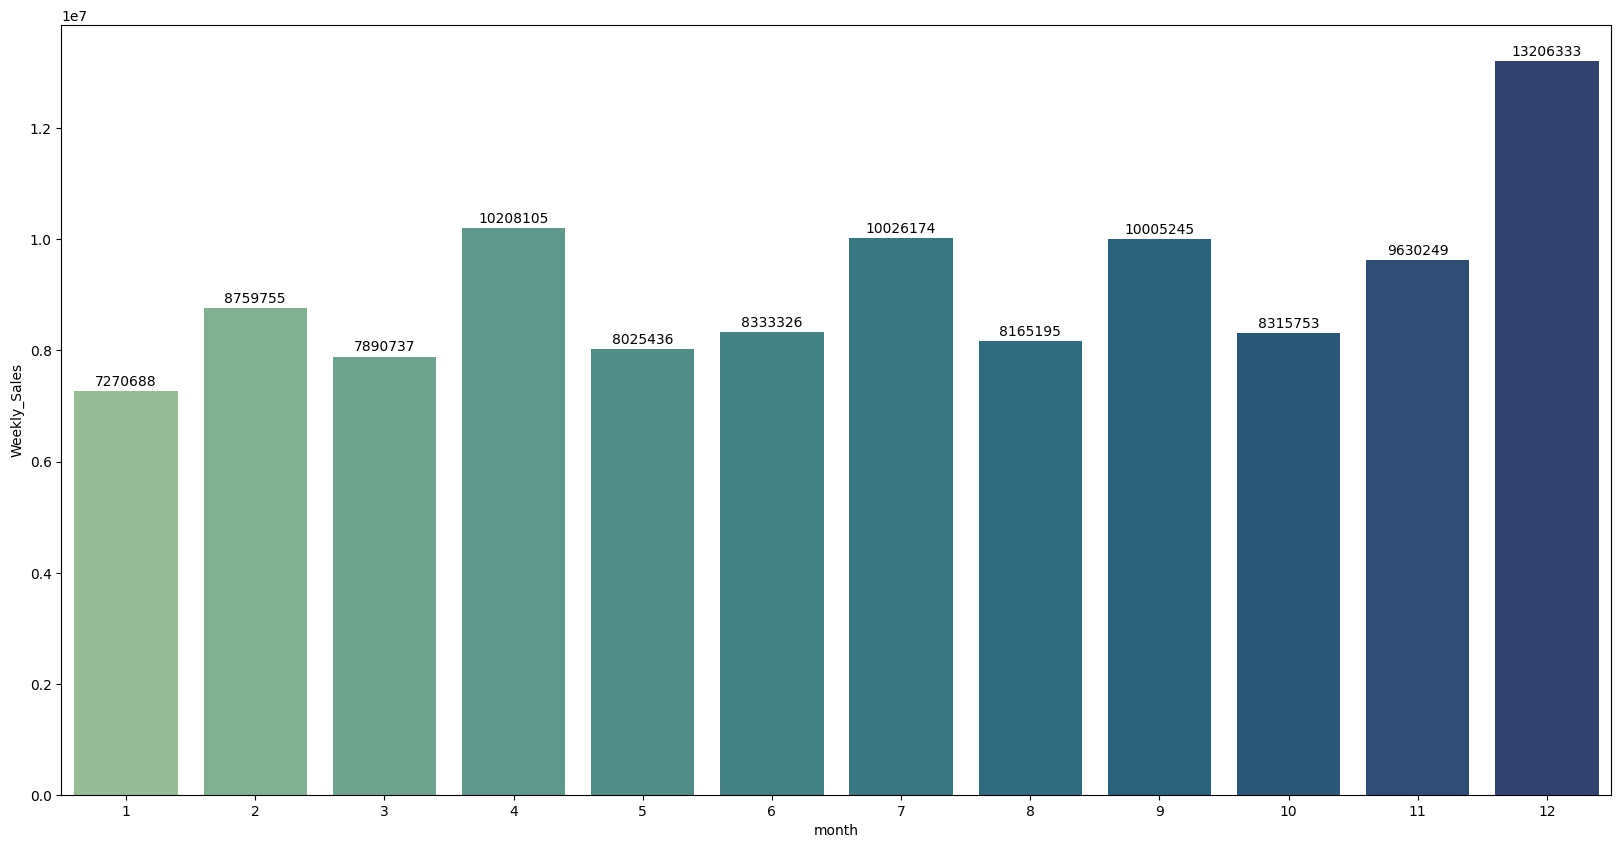

In [146]:
walmart.gráfico_da_melhor_loja_em_2010()

In [147]:
walmart.dataframe()

,index,Store,ranking_das_lojas,faturamento_2010,faturamento_2011,faturamento_2012,faturamento_total,venda_nos_feriados_2010,venda_nos_feriados_2011,venda_nos_feriados_2012,venda_total_nos_feriados,média_de_vendas_semanais
0,19,20,120,101733080,109837002,89827709,301397792,8735434,9211408,4543507,22490350,2058998
1,3,4,40,95680470,111092293,92771189,299543953,8638466,9292794,4499765,22431026,2051352
2,13,14,10,105462242,106096270,77441398,288999911,8441412,8782648,3981768,21205829,1986529
3,12,13,0,95272735,104537513,86707455,286517703,8244769,8650587,4235080,21130438,1957682
4,1,2,0,95277864,98607881,81496695,275382440,8386098,8404471,4002099,20792669,1905830
5,9,10,0,94472202,98916894,78228616,271617713,8543803,8666877,3926879,21137559,1852745
6,26,27,0,90013176,91922684,71920056,253855916,7727731,7702700,3492560,18922992,1766040
7,5,6,0,76912320,80528762,66315047,223756130,6762011,6818386,3228680,16809079,1564728
8,0,1,0,73278832,80921918,68202058,222402808,6472362,6720869,3464244,16657476,1555264
9,38,39,0,65782276,75777603,65885662,207445542,5925262,6533211,3052800,15511274,1450668
